In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [3]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [7]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [9]:
train_X = train.drop(columns=["Exited"])
train_y = train["Exited"]

In [11]:
train_X.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [13]:
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [15]:
train_X.drop(columns=["id","CustomerId", "Surname"], inplace=True)
test.drop(columns=["id","CustomerId", "Surname"], inplace=True)

In [17]:
train_X["Age_Balance_Interaction"] = train_X["Age"] * train_X["Balance"]
train_X["Credit_per_Age"] = train_X["CreditScore"] / (train_X["Age"] + 1)  # 0 나눗셈 방지
train_X["Loyalty_Index"] = train_X["Tenure"] / (train_X["Age"] + 1)
train_X["Balance_to_Income"] = train_X["Balance"] / (train_X["EstimatedSalary"] + 1)
train_X["Engaged_Product_User"] = train_X["NumOfProducts"] * train_X["IsActiveMember"]

In [19]:
test["Age_Balance_Interaction"] = test["Age"] * test["Balance"]
test["Credit_per_Age"] = test["CreditScore"] / (test["Age"] + 1)
test["Loyalty_Index"] = test["Tenure"] / (test["Age"] + 1)
test["Balance_to_Income"] = test["Balance"] / (test["EstimatedSalary"] + 1)
test["Engaged_Product_User"] = test["NumOfProducts"] * test["IsActiveMember"]

In [21]:
str_cols = train_X.select_dtypes(include='object').columns
print("String Columns:", list(str_cols))

String Columns: ['Geography', 'Gender']


In [23]:
train_X = pd.get_dummies(train_X, columns=["Geography", "Gender"], drop_first=True)
test = pd.get_dummies(test, columns=["Geography", "Gender"], drop_first=True)

In [25]:
train_X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Balance_Interaction,Credit_per_Age,Loyalty_Index,Balance_to_Income,Engaged_Product_User,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0.00,19.647059,0.088235,0.000000,0.0,False,False,True
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0.00,18.441176,0.029412,0.000000,2.0,False,False,True
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0.00,16.536585,0.243902,0.000000,0.0,False,False,True
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,5062006.36,16.600000,0.057143,1.760634,1.0,False,False,True
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0.00,21.058824,0.147059,0.000000,2.0,False,True,True


In [27]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(train_X)
train_X = pd.DataFrame(scaled_X, columns=train_X.columns)

test_scaled_X = scaler.transform(test)
test = pd.DataFrame(test_scaled_X, columns=test.columns)
train_X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_Balance_Interaction,Credit_per_Age,Loyalty_Index,Balance_to_Income,Engaged_Product_User,Geography_Germany,Geography_Spain,Gender_Male
0,0.144135,-0.578074,-0.719973,-0.883163,0.814298,0.571263,-0.99555,1.369486,-0.842755,0.462932,-0.564145,-0.024155,-0.900134,-0.515098,-0.530199,0.878465
1,-0.367706,-0.578074,-1.432694,-0.883163,0.814298,0.571263,1.00447,-1.254085,-0.842755,0.190064,-1.277955,-0.024155,1.394276,-0.515098,-0.530199,0.878465
2,0.268974,0.211354,1.774548,-0.883163,0.814298,0.571263,-0.99555,1.437422,-0.842755,-0.240908,1.324839,-0.024155,-0.900134,-0.515098,-0.530199,0.878465
3,-0.941966,-0.465299,-1.076334,1.486918,-1.013348,0.571263,1.00447,-0.557018,1.140544,-0.226559,-0.941444,-0.003317,0.247071,-0.515098,-0.530199,0.878465
4,0.743362,-0.578074,-0.007253,-0.883163,0.814298,0.571263,1.00447,-1.938770,-0.842755,0.782387,0.149665,-0.024155,1.394276,-0.515098,1.886084,0.878465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.131651,-0.578074,-1.076334,-0.883163,-1.013348,0.571263,1.00447,0.382957,-0.842755,0.456276,-0.921050,-0.024155,0.247071,-0.515098,1.886084,-1.138349
165030,1.692140,-0.352523,-0.719973,-0.883163,-1.013348,-1.750507,-0.99555,0.382951,-0.842755,0.995357,-0.623629,-0.024155,-0.900134,-0.515098,-0.530199,0.878465
165031,-1.141708,-0.803625,-0.007253,-0.883163,-1.013348,0.571263,1.00447,0.295366,-0.842755,0.012450,0.261198,-0.024155,0.247071,-0.515098,-0.530199,0.878465
165032,-1.279031,-0.916401,0.705467,1.688303,-1.013348,-1.750507,1.00447,-0.823217,1.055908,0.061037,1.105249,0.002706,0.247071,-0.515098,1.886084,-1.138349


In [29]:
X_train, X_val, y_train, y_val = train_test_split(
    train_X, train_y, test_size=0.2, random_state=42, stratify=train_y
)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  
    'class_weight': ['balanced'],
    'max_iter': [500]
}

# Set up the model and GridSearchCV
grid_logreg = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,                        # 5-fold cross-validation
    scoring='roc_auc',           # Evaluation metric: AUC
    n_jobs=-1,                   # Use all available cores
    verbose=1                    # Show progress
)

# Train the model using grid search
grid_logreg.fit(X_train, y_train)

# Show best parameters and best CV score
print("🔎 Best parameters:", grid_logreg.best_params_)
print("✅ Best CV AUC score:", grid_logreg.best_score_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
🔎 Best parameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
✅ Best CV AUC score: 0.8201204403429474


In [44]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on the validation set
val_probs = grid_logreg.best_estimator_.predict_proba(X_val)[:, 1]

# Calculate AUC on the validation set
val_auc_log = roc_auc_score(y_val, val_probs)
print("📊 Validation AUC:", val_auc)

📊 Validation AUC: 0.8088486817041177


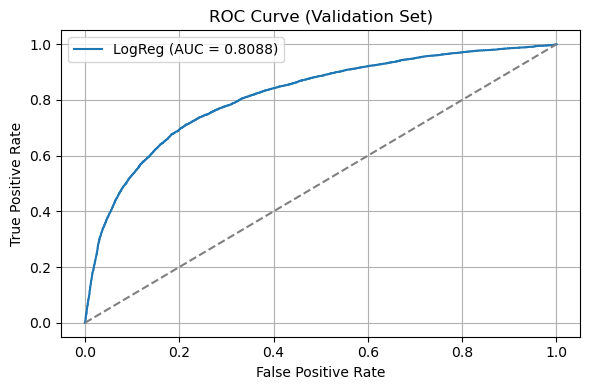

In [47]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Get false positive rate, true positive rate
fpr, tpr, _ = roc_curve(y_val, val_probs)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"LogReg (AUC = {val_auc:.4f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [5],      # Maximum depth of trees
    'min_samples_split': [5, 10],     # Minimum samples required to split a node
    'min_samples_leaf': [2, 4],       # Minimum samples required at each leaf node
    'max_features': ['sqrt', 'log2']     # Number of features to consider at each split
}

# Set up model and grid search
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(
    rf,
    param_grid,
    scoring='roc_auc',     # Evaluation metric: AUC
    cv=5,                  # 5-fold cross-validation
    n_jobs=-1,             # Use all CPU cores
    verbose=1              # Show progress
)

# Train the model
grid_rf.fit(X_train, y_train)

# Print best hyperparameters and cross-validated AUC
print("✅ Best Params:", grid_rf.best_params_)
print("🔎 Best CV AUC:", grid_rf.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
✅ Best Params: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
🔎 Best CV AUC: 0.8771343856535969


In [35]:
from sklearn.metrics import roc_auc_score

# Predict probabilities on validation set
val_probs_rf = grid_rf.best_estimator_.predict_proba(X_val)[:, 1]

# Compute AUC score
val_auc_rf = roc_auc_score(y_val, val_probs_rf)
print("📊 Validation AUC (RandomForest):", val_auc_rf)

📊 Validation AUC (RandomForest): 0.8773735584113428


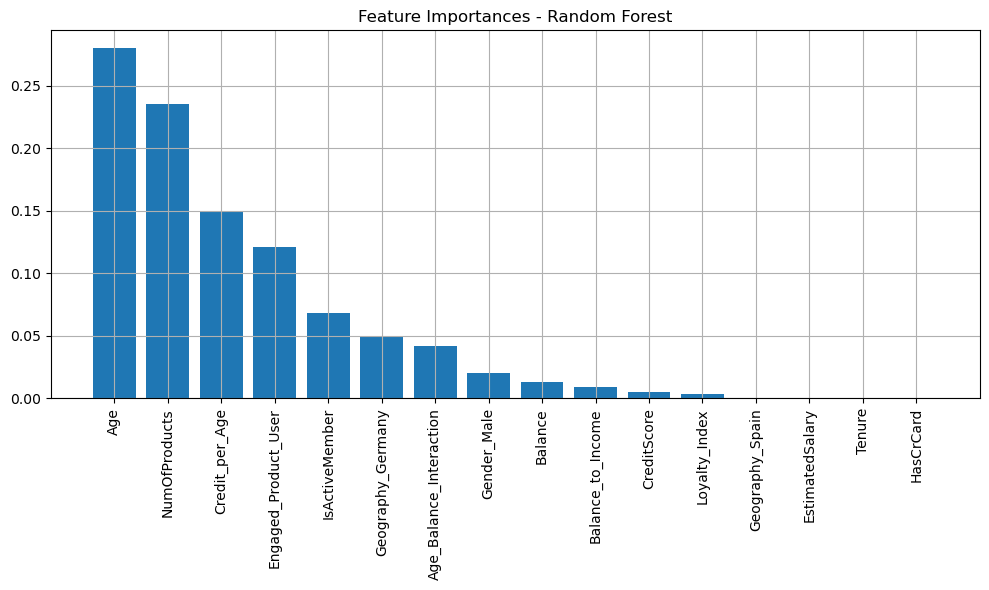

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importances
importances = grid_rf.best_estimator_.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
plt.grid(True)
plt.show()

📊 Validation AUC (SVM): 0.8088


/var/folders/m5/1r9mn4q91l71fs60pntnw8qr0000gn/T/ipykernel_3494/39866222.py:30: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


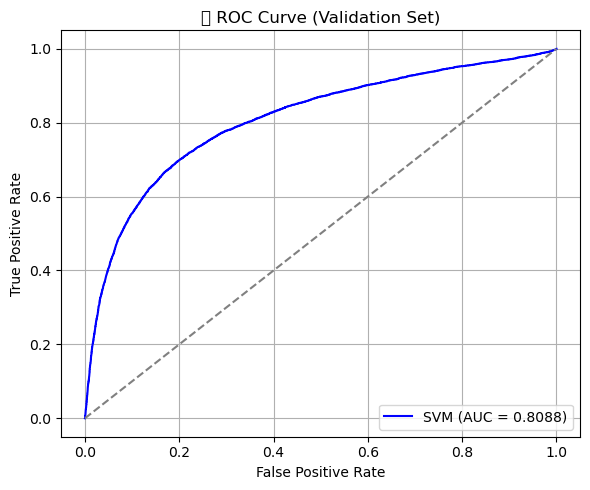

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 1. SVM 모델 정의 (단일 하이퍼파라미터)
svm = SVC(C=1.0, kernel='linear', probability=True)

# 2. 모델 학습
svm.fit(X_train, y_train)

# 3. 검증 세트 확률 예측
val_probs = svm.predict_proba(X_val)[:, 1]  # 클래스 1의 확률

# 4. AUC 계산
val_auc = roc_auc_score(y_val, val_probs)
print(f"📊 Validation AUC (SVM): {val_auc:.4f}")

# 5. ROC 커브를 위한 FPR, TPR 계산
fpr, tpr, thresholds = roc_curve(y_val, val_probs)

# 6. 시각화
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"SVM (AUC = {val_auc:.4f})", color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # 랜덤 예측 기준선
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve (Validation Set)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/m5/1r9mn4q91l71fs60pntnw8qr0000gn/T/ipykernel_3494/1711680346.py:19: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


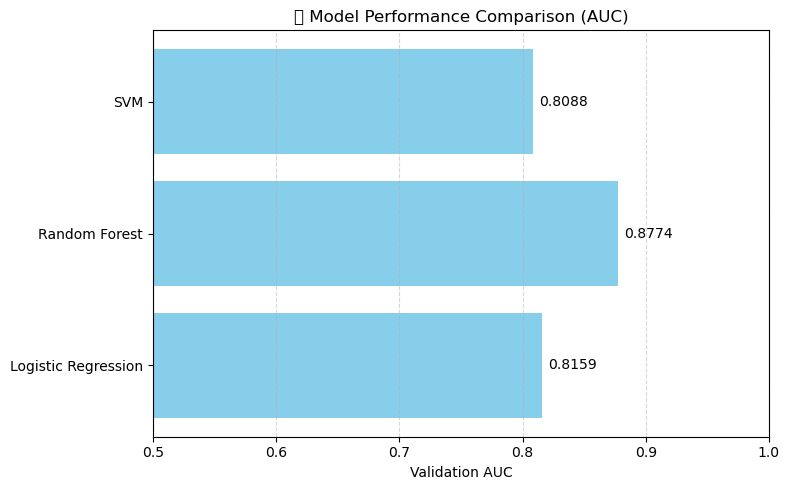

In [49]:
import matplotlib.pyplot as plt

# AUC scores
models = ["Logistic Regression", "Random Forest", "SVM"]
auc_scores = [val_auc_log, val_auc_rf, val_auc]

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(models, auc_scores, color="skyblue")
plt.xlabel("Validation AUC")
plt.title("📊 Model Performance Comparison (AUC)")

# Annotate each bar with AUC score
for bar, score in zip(bars, auc_scores):
    plt.text(score + 0.005, bar.get_y() + bar.get_height()/2, f"{score:.4f}", va='center')

plt.xlim(0.5, 1.0)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [51]:
idcsv = pd.read_csv("test.csv")
test_id = idcsv['CustomerId']
test_probs = grid_rf.best_estimator_.predict_proba(test)[:, 1]

submission = pd.DataFrame({
    "CustomerId": test_id,
    "Exited": test_probs
})

# 저장
submission.to_csv("submission_rf.csv", index=False)
print("✅ Saved: submission_rf.csv")

✅ Saved: submission_rf.csv
